In [1]:
#Chargement des datasets
import numpy as np
import requests
import io

base_url = "https://raw.githubusercontent.com/lmuxz/SCDA/master/data/"
suffixes = ["test", "test_label", "train", "train_label"]

# Dictionnaire pour stocker les matrices numpy
data_store = {}

for i in range(4):
    for suffix in suffixes:
        file_name = f"kaggle_source_cate_{i}_{suffix}.npy"
        url = f"{base_url}{file_name}"

        response = requests.get(url)

        if response.status_code == 200:
            # numpy.load nécessite un objet "file-like", d'où l'utilisation de BytesIO
            data_store[file_name] = np.load(io.BytesIO(response.content))
            print(f"Chargé : {file_name} | Forme : {data_store[file_name].shape}")
        else:
            print(f"Échec pour {file_name} (Code : {response.status_code})")

# Exemple d'accès :
# train_data_0 = data_store['kaggle_source_cate_0_train.npy']

Chargé : kaggle_source_cate_0_test.npy | Forme : (13686, 51)
Chargé : kaggle_source_cate_0_test_label.npy | Forme : (13686, 2)
Chargé : kaggle_source_cate_0_train.npy | Forme : (41058, 51)
Chargé : kaggle_source_cate_0_train_label.npy | Forme : (41058, 2)
Chargé : kaggle_source_cate_1_test.npy | Forme : (13686, 51)
Chargé : kaggle_source_cate_1_test_label.npy | Forme : (13686, 2)
Chargé : kaggle_source_cate_1_train.npy | Forme : (41058, 51)
Chargé : kaggle_source_cate_1_train_label.npy | Forme : (41058, 2)
Chargé : kaggle_source_cate_2_test.npy | Forme : (13686, 51)
Chargé : kaggle_source_cate_2_test_label.npy | Forme : (13686, 2)
Chargé : kaggle_source_cate_2_train.npy | Forme : (41058, 51)
Chargé : kaggle_source_cate_2_train_label.npy | Forme : (41058, 2)
Chargé : kaggle_source_cate_3_test.npy | Forme : (13686, 51)
Chargé : kaggle_source_cate_3_test_label.npy | Forme : (13686, 2)
Chargé : kaggle_source_cate_3_train.npy | Forme : (41058, 51)
Chargé : kaggle_source_cate_3_train_label.n

In [2]:
# Passage en dataframe pandas
import pandas as pd

all_train_dfs = []
all_test_dfs = []
datasets_par_index = {}

for i in range(4):
    print(f"Traitement de l'index {i}...")

    # 1. Récupération
    X_train_raw = data_store[f'kaggle_source_cate_{i}_train.npy']
    y_train_raw = data_store[f'kaggle_source_cate_{i}_train_label.npy']
    X_test_raw  = data_store[f'kaggle_source_cate_{i}_test.npy']
    y_test_raw  = data_store[f'kaggle_source_cate_{i}_test_label.npy']

    # 2. Conversion dynamique
    df_X_train = pd.DataFrame(X_train_raw).add_prefix('feat_')
    df_X_test  = pd.DataFrame(X_test_raw).add_prefix('feat_')

    # On crée les noms de colonnes dynamiquement pour les labels (label_0, label_1, etc.)
    col_labels = [f'label_{j}' for j in range(y_train_raw.shape[1])]
    df_y_train = pd.DataFrame(y_train_raw, columns=col_labels)
    df_y_test  = pd.DataFrame(y_test_raw, columns=col_labels)

    # 3. Concaténation horizontale
    df_train_full = pd.concat([df_X_train, df_y_train], axis=1)
    df_test_full  = pd.concat([df_X_test, df_y_test], axis=1)

    # Identification de la source
    df_train_full['source_index'] = i
    df_test_full['source_index'] = i

    datasets_par_index[i] = {'train': df_train_full, 'test': df_test_full}
    all_train_dfs.append(df_train_full)
    all_test_dfs.append(df_test_full)

# 4. Fusion finale
df_final_train = pd.concat(all_train_dfs, ignore_index=True)
df_final_test  = pd.concat(all_test_dfs, ignore_index=True)

print(f"\nTerminé ! Colonnes créées pour les labels : {col_labels}")
print(f"Format final du train : {df_final_train.shape}")
print(f"Format final du train : {df_final_test.shape}")
print(df_final_train.head)

Traitement de l'index 0...
Traitement de l'index 1...
Traitement de l'index 2...
Traitement de l'index 3...

Terminé ! Colonnes créées pour les labels : ['label_0', 'label_1']
Format final du train : (164232, 54)
Format final du train : (54744, 54)
<bound method NDFrame.head of         feat_0  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  \
0          1.0   124.0     1.0   399.0    39.0     2.0     2.0     1.0   
1          0.0    44.0     3.0   289.0    39.0     0.0    31.0     1.0   
2          1.0    45.0     1.0   375.0    39.0     4.0    96.0     2.0   
3          1.0    98.0     1.0   159.0    39.0     4.0    52.0     1.0   
4          0.0   101.0     2.0    71.0    39.0     4.0    96.0     1.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
164227     1.0    57.0     0.0   100.0    65.0     4.0    32.0     2.0   
164228     1.0    60.0     0.0   427.0    65.0     4.0    32.0     2.0   
164229     0.0    57.0     0.0   100.0    65.0     4.0 

Format du dataset "train"=164232 lignes, 54 colonnes (52 variables, 2 cibles)
L'ensemble des variables d'entraînement sont qualifiées avec le prefixe "feat_ " les colonnes cibles avec le préfixe "label_"

In [3]:
# Affichage des 5 premières lignes des labels pour l'index 0
print("Aperçu des labels (index 0) :")
display(datasets_par_index[0]['train'][[f'label_{j}' for j in range(y_train_raw.shape[1])]].head())

# Vérification des valeurs uniques pour voir si c'est du binaire (0/1)
print("\nValeurs uniques par colonne de label :")
for col in [f'label_{j}' for j in range(y_train_raw.shape[1])]:
    unique_vals = datasets_par_index[0]['train'][col].unique()
    print(f"{col} : {unique_vals}")

Aperçu des labels (index 0) :


,label_0,label_1
0,0,0
1,2,0
2,3,0
3,4,0
4,6,0



Valeurs uniques par colonne de label :
label_0 : [    0     2     3 ... 54740 54741 54743]
label_1 : [0 1]


la colonne "label_1" servira de cible (1=fraude, 0= non fraude)

--- Répartition des classes ---
Classe 0 : 147954 individus (90.09%)
Classe 1 : 16278 individus (9.91%)


/var/folders/mj/xqy4yn_14pv5x_ql3g4s17w40000gn/T/ipykernel_48450/3564821691.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


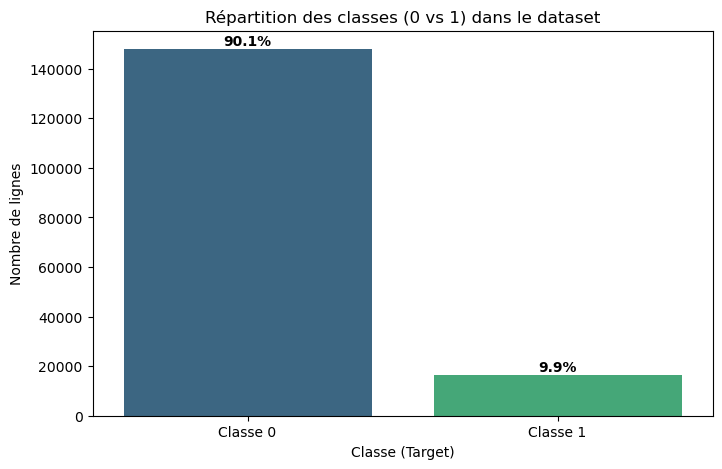

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcul des proportions
counts = df_final_train['label_1'].value_counts()
proportions = df_final_train['label_1'].value_counts(normalize=True) * 100

print("--- Répartition des classes ---")
for val, count in counts.items():
    print(f"Classe {val} : {count} individus ({proportions[val]:.2f}%)")

# 2. Création du graphique
plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('Répartition des classes (0 vs 1) dans le dataset')
plt.xlabel('Classe (Target)')
plt.ylabel('Nombre de lignes')
plt.xticks(ticks=[0, 1], labels=['Classe 0', 'Classe 1'])

# Ajout des pourcentages au-dessus des barres
for i, count in enumerate(counts):
    plt.text(i, count + (max(counts)*0.01), f'{proportions[i]:.1f}%', ha='center', fontweight='bold')

plt.show()

--- Répartition des classes ---
Classe 0 : 147954 individus (90.09%)
Classe 1 : 16278 individus (9.91%)

--- Répartition des classes ---
Classe 0 : 49318 individus (90.09%)
Classe 1 : 5426 individus (9.91%)


/var/folders/mj/xqy4yn_14pv5x_ql3g4s17w40000gn/T/ipykernel_48450/1376249420.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


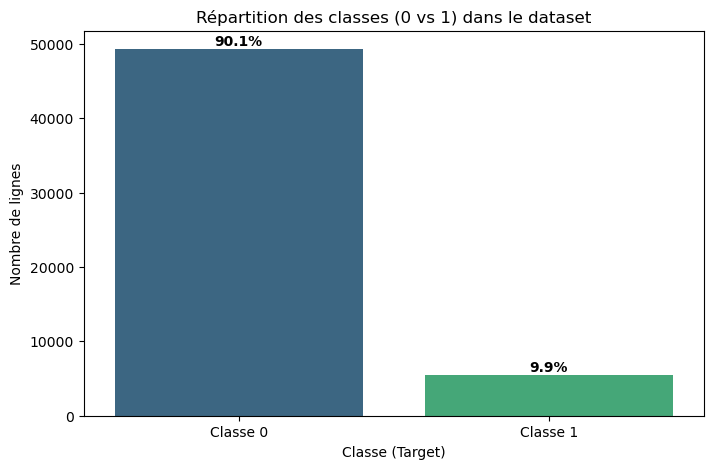

In [5]:
# 1. Calcul des proportions
counts = df_final_test['label_1'].value_counts()
proportions = df_final_test['label_1'].value_counts(normalize=True) * 100

print("--- Répartition des classes ---")
for val, count in counts.items():
    print(f"Classe {val} : {count} individus ({proportions[val]:.2f}%)")

# 2. Création du graphique
plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('Répartition des classes (0 vs 1) dans le dataset')
plt.xlabel('Classe (Target)')
plt.ylabel('Nombre de lignes')
plt.xticks(ticks=[0, 1], labels=['Classe 0', 'Classe 1'])

# Ajout des pourcentages au-dessus des barres
for i, count in enumerate(counts):
    plt.text(i, count + (max(counts)*0.01), f'{proportions[i]:.1f}%', ha='center', fontweight='bold')

plt.show()

In [6]:
#vérification des variables si certaines sont des constantes
# 1. Identifier les colonnes 'feat_'
feat_cols = [c for c in df_final_train.columns if c.startswith('feat_')]

# 2. Vérifier le nombre de valeurs uniques par colonne
# nunique() renvoie 1 si toutes les valeurs de la colonne sont identiques
constant_features = [col for col in feat_cols if df_final_train[col].nunique() <= 1]

# 3. Affichage des résultats
print(f"Nombre total de descripteurs analysés : {len(feat_cols)}")
print(f"Nombre de descripteurs constants trouvés : {len(constant_features)}")

if len(constant_features) > 0:
    print("\nListe des descripteurs constants :")
    print(constant_features)

    # Optionnel : Supprimer ces colonnes des datasets
    # df_final_train.drop(columns=constant_features, inplace=True)
    # df_final_test.drop(columns=constant_features, inplace=True)
    # print("\nColonnes constantes supprimées des DataFrames.")
else:
    print("\nAucun descripteur constant détecté. Tous les 'feat_' varient !")

Nombre total de descripteurs analysés : 51
Nombre de descripteurs constants trouvés : 0

Aucun descripteur constant détecté. Tous les 'feat_' varient !


--- Top 10 des corrélations positives (liées au '1') ---
feat_27    0.328236
feat_29    0.321288
feat_14    0.311353
feat_28    0.307520
feat_15    0.255673
feat_26    0.239785
feat_21    0.239022
feat_33    0.226075
feat_32    0.226042
feat_19    0.213979
feat_22    0.199539
feat_16    0.197483
feat_17    0.188287
feat_18    0.175339
feat_20    0.153455
Name: label_1, dtype: float64

--- Top 10 des corrélations négatives (liées au '0') ---
feat_30   -0.005994
feat_23   -0.006411
feat_46   -0.008310
feat_5    -0.010759
feat_45   -0.024197
feat_25   -0.027410
feat_3    -0.053922
feat_10   -0.060419
feat_6    -0.067218
feat_2    -0.067941
feat_1    -0.075770
feat_11   -0.097625
feat_9    -0.098080
feat_7    -0.098347
feat_0    -0.105868
Name: label_1, dtype: float64


/var/folders/mj/xqy4yn_14pv5x_ql3g4s17w40000gn/T/ipykernel_48450/3796740391.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='coolwarm')


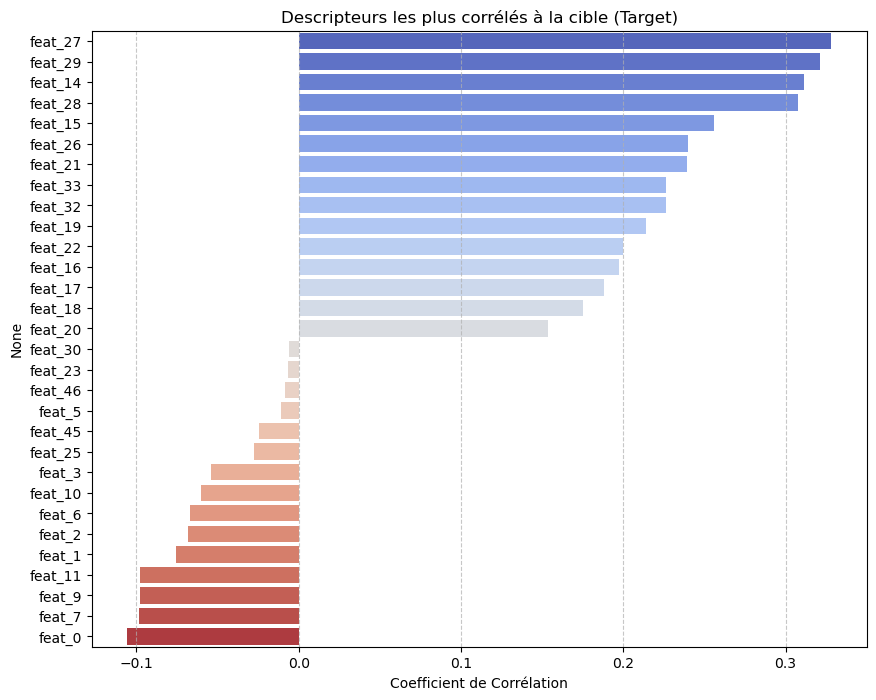

In [7]:
# 1. Calcul de la corrélation entre toutes les colonnes et la cible
# On se concentre uniquement sur la colonne 'target' (anciennement label_1)
correlations = df_final_train.corr()['label_1'].sort_values(ascending=False)

# 2. Séparation des corrélations positives et négatives fortes
# On exclut la cible elle-même (qui a une corrélation de 1.0)
top_positives = correlations[correlations < 1.0].head(15)
top_negatives = correlations.tail(15)

print("--- Top 10 des corrélations positives (liées au '1') ---")
print(top_positives)

print("\n--- Top 10 des corrélations négatives (liées au '0') ---")
print(top_negatives)

# 3. Visualisation des corrélations les plus importantes
plt.figure(figsize=(10, 8))
top_corr_features = pd.concat([top_positives, top_negatives])
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='coolwarm')
plt.title('Descripteurs les plus corrélés à la cible (Target)')
plt.xlabel('Coefficient de Corrélation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Proche de 1 : Lorsque la valeur du feat_ augmente, la probabilité que la cible soit 1 augmente fortement.

Proche de -1 : Lorsque la valeur du feat_ augmente, la probabilité que la cible soit 1 diminue (donc elle tend vers 0).

Proche de 0 : Le descripteur n'a aucune relation linéaire avec la cible. S'ils sont tous proches de 0, votre modèle aura besoin de relations non-linéaires (comme les Random Forests ou les Réseaux de Neurones).

Extrait de la matrice de corrélation (Top 15 features) :


,feat_27,feat_29,feat_14,feat_28,feat_15,feat_26,feat_21,feat_33,feat_32,feat_19,feat_22,feat_16,feat_17,feat_18,feat_20,label_1
feat_27,1.000000,0.972967,0.237411,0.940996,0.140721,0.514970,0.131201,0.539754,0.547157,0.137075,0.152515,0.113448,0.112678,0.134282,0.083801,0.328236
feat_29,0.972967,1.000000,0.243128,0.974823,0.140589,0.506388,0.132836,0.538001,0.533542,0.143106,0.144073,0.118939,0.107385,0.126596,0.102320,0.321288
feat_14,0.237411,0.243128,1.000000,0.245426,0.925046,0.201572,0.956782,0.156358,0.156253,0.924358,0.848336,0.926890,0.917406,0.842597,0.857397,0.311353
feat_28,0.940996,0.974823,0.245426,1.000000,0.137192,0.496105,0.130968,0.521093,0.516003,0.147233,0.130971,0.120728,0.094262,0.114210,0.122287,0.307520
feat_15,0.140721,0.140589,0.925046,0.137192,1.000000,0.175703,0.939404,0.115398,0.117216,0.935926,0.865451,0.896761,0.875371,0.849384,0.895482,0.255673
feat_26,0.514970,0.506388,0.201572,0.496105,0.175703,1.000000,0.158883,0.287209,0.291279,0.163627,0.177598,0.138641,0.138388,0.160837,0.112847,0.239785
feat_21,0.131201,0.132836,0.956782,0.130968,0.939404,0.158883,1.000000,0.102031,0.102419,0.944587,0.876263,0.948607,0.934401,0.861177,0.889711,0.239022
feat_33,0.539754,0.538001,0.156358,0.521093,0.115398,0.287209,0.102031,1.000000,0.984361,0.112680,0.094670,0.093863,0.093065,0.084665,0.069547,0.226075
feat_32,0.547157,0.533542,0.156253,0.516003,0.117216,0.291279,0.102419,0.984361,1.000000,0.111641,0.099572,0.092911,0.094211,0.089269,0.067128,0.226042
feat_19,0.137075,0.143106,0.924358,0.147233,0.935926,0.163627,0.944587,0.112680,0.111641,1.000000,0.834072,0.916286,0.874731,0.829028,0.913658,0.213979


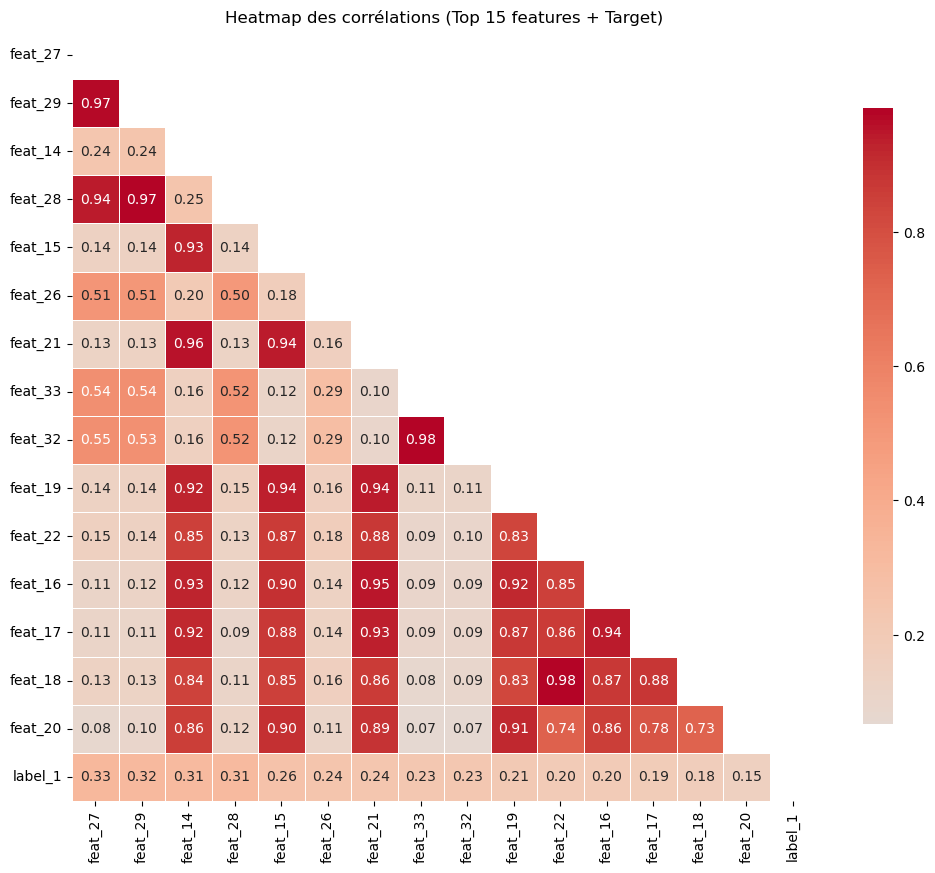

In [8]:
# 1. Sélection des colonnes les plus pertinentes pour éviter de surcharger la heatmap
# On prend les 15 descripteurs les plus corrélés à la cible (en valeur absolue)
target_corr = df_final_train.corr()['label_1'].abs().sort_values(ascending=False)
top_features = target_corr.iloc[1:16].index.tolist() # On exclut la target elle-même

# 2. Calcul de la matrice de corrélation pour ces colonnes + la target
corr_matrix = df_final_train[top_features + ['label_1']].corr()

# 3. Affichage de la table (Matrice)
print("Extrait de la matrice de corrélation (Top 15 features) :")
display(corr_matrix)

# 4. Génération de la Heatmap
plt.figure(figsize=(12, 10))

# Masque pour ne pas afficher la moitié supérieure (doublon symétrique)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,          # Affiche les valeurs
            fmt=".2f",           # 2 décimales
            cmap='coolwarm',     # Bleu (négatif) à Rouge (positif)
            center=0,
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.title('Heatmap des corrélations (Top 15 features + Target)')
plt.show()

Extrait de la matrice de corrélation (Top 15 features) :
feat_27	feat_29	feat_14	feat_28	feat_15	feat_26	feat_21	feat_33	feat_32	feat_19	feat_22	feat_16	feat_17	feat_18	feat_20	label_1
feat_27	1.000000	0.972967	0.237411	0.940996	0.140721	0.514970	0.131201	0.539754	0.547157	0.137075	0.152515	0.113448	0.112678	0.134282	0.083801	0.328236
feat_29	0.972967	1.000000	0.243128	0.974823	0.140589	0.506388	0.132836	0.538001	0.533542	0.143106	0.144073	0.118939	0.107385	0.126596	0.102320	0.321288
feat_14	0.237411	0.243128	1.000000	0.245426	0.925046	0.201572	0.956782	0.156358	0.156253	0.924358	0.848336	0.926890	0.917406	0.842597	0.857397	0.311353
feat_28	0.940996	0.974823	0.245426	1.000000	0.137192	0.496105	0.130968	0.521093	0.516003	0.147233	0.130971	0.120728	0.094262	0.114210	0.122287	0.307520
feat_15	0.140721	0.140589	0.925046	0.137192	1.000000	0.175703	0.939404	0.115398	0.117216	0.935926	0.865451	0.896761	0.875371	0.849384	0.895482	0.255673
feat_26	0.514970	0.506388	0.201572	0.496105	0.175703	1.000000	0.158883	0.287209	0.291279	0.163627	0.177598	0.138641	0.138388	0.160837	0.112847	0.239785
feat_21	0.131201	0.132836	0.956782	0.130968	0.939404	0.158883	1.000000	0.102031	0.102419	0.944587	0.876263	0.948607	0.934401	0.861177	0.889711	0.239022
feat_33	0.539754	0.538001	0.156358	0.521093	0.115398	0.287209	0.102031	1.000000	0.984361	0.112680	0.094670	0.093863	0.093065	0.084665	0.069547	0.226075
feat_32	0.547157	0.533542	0.156253	0.516003	0.117216	0.291279	0.102419	0.984361	1.000000	0.111641	0.099572	0.092911	0.094211	0.089269	0.067128	0.226042
feat_19	0.137075	0.143106	0.924358	0.147233	0.935926	0.163627	0.944587	0.112680	0.111641	1.000000	0.834072	0.916286	0.874731	0.829028	0.913658	0.213979
feat_22	0.152515	0.144073	0.848336	0.130971	0.865451	0.177598	0.876263	0.094670	0.099572	0.834072	1.000000	0.847365	0.860452	0.982596	0.735706	0.199539
feat_16	0.113448	0.118939	0.926890	0.120728	0.896761	0.138641	0.948607	0.093863	0.092911	0.916286	0.847365	1.000000	0.939392	0.869838	0.857603	0.197483
feat_17	0.112678	0.107385	0.917406	0.094262	0.875371	0.138388	0.934401	0.093065	0.094211	0.874731	0.860452	0.939392	1.000000	0.883584	0.777877	0.188287
feat_18	0.134282	0.126596	0.842597	0.114210	0.849384	0.160837	0.861177	0.084665	0.089269	0.829028	0.982596	0.869838	0.883584	1.000000	0.729056	0.175339
feat_20	0.083801	0.102320	0.857397	0.122287	0.895482	0.112847	0.889711	0.069547	0.067128	0.913658	0.735706	0.857603	0.777877	0.729056	1.000000	0.153455
label_1	0.328236	0.321288	0.311353	0.307520	0.255673	0.239785	0.239022	0.226075	0.226042	0.213979	0.199539	0.197483	0.188287	0.175339	0.153455	1.000000




La dernière ligne/colonne (target) : Confirme quels descripteurs impactent le plus votre prédiction.

Les zones rouges/bleues intenses entre deux feat_ : Si vous voyez un score supérieur à 0.85 ou inférieur à -0.85 entre deux descripteurs, ils sont dits "colinéaires".

In [9]:
#identification de variables redondantes
# 1. Calcul de la matrice de corrélation absolue
# On utilise la valeur absolue car une corrélation de -0.95 est aussi redondante que 0.95
corr_matrix = df_final_train.corr().abs()

# 2. Sélectionner la partie supérieure de la matrice pour éviter les doublons (A-B et B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Trouver les colonnes avec une corrélation supérieure au seuil de 0.90
threshold = 0.90
redundant_pairs = [
    (column, row, upper.loc[row, column])
    for column in upper.columns
    for row in upper.index
    if upper.loc[row, column] > threshold
]

# 4. Affichage des résultats
print(f"--- Recherche des variables redondantes (Seuil > {threshold}) ---")
if not redundant_pairs:
    print("Aucune paire de variables fortement corrélées n'a été trouvée.")
else:
    print(f"Nombre de paires trouvées : {len(redundant_pairs)}\n")
    for var1, var2, val in redundant_pairs:
        print(f"🔴 {var1} et {var2} sont corrélées à {val:.4f}")

# 5. Optionnel : Lister les colonnes à supprimer
# On choisit de supprimer la deuxième variable de chaque paire pour nettoyer le dataset
to_drop = [pair[0] for pair in redundant_pairs]
to_drop = list(set(to_drop)) # Supprimer les doublons dans la liste de suppression

print(f"\nSuggestion de colonnes à supprimer ({len(to_drop)}) : {to_drop}")

--- Recherche des variables redondantes (Seuil > 0.9) ---
Nombre de paires trouvées : 25

🔴 feat_15 et feat_14 sont corrélées à 0.9250
🔴 feat_16 et feat_14 sont corrélées à 0.9269
🔴 feat_17 et feat_14 sont corrélées à 0.9174
🔴 feat_17 et feat_16 sont corrélées à 0.9394
🔴 feat_19 et feat_14 sont corrélées à 0.9244
🔴 feat_19 et feat_15 sont corrélées à 0.9359
🔴 feat_19 et feat_16 sont corrélées à 0.9163
🔴 feat_20 et feat_19 sont corrélées à 0.9137
🔴 feat_21 et feat_14 sont corrélées à 0.9568
🔴 feat_21 et feat_15 sont corrélées à 0.9394
🔴 feat_21 et feat_16 sont corrélées à 0.9486
🔴 feat_21 et feat_17 sont corrélées à 0.9344
🔴 feat_21 et feat_19 sont corrélées à 0.9446
🔴 feat_22 et feat_18 sont corrélées à 0.9826
🔴 feat_23 et feat_20 sont corrélées à 0.9098
🔴 feat_28 et feat_27 sont corrélées à 0.9410
🔴 feat_29 et feat_27 sont corrélées à 0.9730
🔴 feat_29 et feat_28 sont corrélées à 0.9748
🔴 feat_33 et feat_32 sont corrélées à 0.9844
🔴 feat_35 et feat_34 sont corrélées à 0.9393
🔴 feat_39 

Suggestion de colonnes à supprimer (16) : ['feat_16', 'feat_22', 'feat_29', 'feat_33', 'feat_17', 'feat_20', 'feat_21', 'feat_49', 'feat_35', 'feat_23', 'feat_48', 'feat_28', 'feat_39', 'feat_19', 'feat_15', 'feat_43']

In [10]:
#définition des ensembles X_train, X_test, y_train et y_test
X_train= df_X_train
X_test=df_X_test
y_train=df_y_train['label_1']
y_test=df_y_test['label_1']


In [13]:
#test Régression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, make_scorer
import numpy as np

# 1. Configuration du protocole de validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Définition du modèle de base
# Note : On utilise le solver 'liblinear' car il supporte à la fois 'l1' et 'l2'
lr_model = LogisticRegression(solver='liblinear', random_state=42)

# 3. Grille d'hyperparamètres
# C est l'inverse de la force de régularisation.
# Une fourchette de [10^-3 à 10^2] est couverte par une échelle logarithmique.
param_grid = {
    'C': np.logspace(-3, 2, 10),
    'penalty': ['l1', 'l2']
}

# 4. Initialisation de la recherche par grille (GridSearch)
# Optimisation basée sur le score F1
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',
    verbose=1,
    n_jobs=-1  # Utilise tous les processeurs disponibles
)

# 5. Entraînement sur X_train et y_train
print("Début de l'optimisation des hyperparamètres...")
grid_search.fit(X_train, y_train.values.ravel())

# 6. Résultats et évaluation
print(f"\nMeilleurs hyperparamètres : {grid_search.best_params_}")
print(f"Meilleur score F1 en validation croisée : {grid_search.best_score_:.4f}")

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

print("\n--- Rapport de performance sur l'ensemble Test ---")
print(classification_report(y_test, y_pred))

# ===============================
# Évaluation finale
# ===============================

# Récupération du meilleur modèle
best_lr = grid_search.best_estimator_

# Prédictions finales sur le jeu de test
y_pred_lr = best_lr.predict(X_test)

# Métriques
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr    = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr        = f1_score(y_test, y_pred_lr, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_lr:.3f}")
print(f"Recall    (fraude): {recall_lr:.3f}")
print(f"F1-score  (fraude): {f1_lr:.3f}")

Début de l'optimisation des hyperparamètres...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead


Meilleurs hyperparamètres : {'C': np.float64(27.825594022071257), 'penalty': 'l2'}
Meilleur score F1 en validation croisée : 0.6321

--- Rapport de performance sur l'ensemble Test ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12290
           1       0.82      0.49      0.62      1396

    accuracy                           0.94     13686
   macro avg       0.88      0.74      0.79     13686
weighted avg       0.93      0.94      0.93     13686


--- Métriques finales ---
Precision (fraude): 0.819
Recall    (fraude): 0.494
F1-score  (fraude): 0.616


Résultats : Début de l'optimisation des hyperparamètres...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Meilleurs hyperparamètres : {'C': np.float64(7.742636826811277), 'penalty': 'l2'}
Meilleur score F1 en validation croisée : 0.6317

--- Rapport de performance sur l'ensemble Test ---
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12290
           1       0.82      0.49      0.62      1396

    accuracy                           0.94     13686
   macro avg       0.88      0.74      0.79     13686
weighted avg       0.93      0.94      0.93     13686


--- Métriques finales ---  
Precision (fraude): 0.819  
Recall    (fraude): 0.494  
F1-score  (fraude): 0.616

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, make_scorer

# Configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid_rf = {
    'n_estimators': [100, 500],
    'max_depth': [10, 30, None]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train.values.ravel())
print(f"RF - Meilleurs paramètres: {grid_rf.best_params_}")
print(f"RF - Score F1 Test: {grid_rf.score(X_test, y_test):.4f}")
# Prédiction sur l'ensemble de test
y_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred))

# ===============================
# Random Forest - Évaluation finale
# ===============================

# Meilleur modèle RF
best_rf = grid_rf.best_estimator_

# Prédictions finales sur le jeu de test
y_pred_rf = best_rf.predict(X_test)

# Métriques
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf    = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf        = f1_score(y_test, y_pred_rf, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_rf:.3f}")
print(f"Recall    (fraude): {recall_rf:.3f}")
print(f"F1-score  (fraude): {f1_rf:.3f}")

RF - Meilleurs paramètres: {'max_depth': None, 'n_estimators': 500}
RF - Score F1 Test: 0.7589
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12290
           1       0.91      0.65      0.76      1396

    accuracy                           0.96     13686
   macro avg       0.93      0.82      0.87     13686
weighted avg       0.96      0.96      0.95     13686


--- Métriques finales (utilisées dans le rapport) ---
Precision (fraude): 0.906
Recall    (fraude): 0.653
F1-score  (fraude): 0.759


RF - Meilleurs paramètres: {'max_depth': None, 'n_estimators': 500}  
RF - Score F1 Test: 0.7589  
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12290
           1       0.91      0.65      0.76      1396

    accuracy                           0.96     13686
   macro avg       0.93      0.82      0.87     13686
weighted avg       0.96      0.96      0.95     13686


--- Métriques finales ---  
Precision (fraude): 0.906  
Recall    (fraude): 0.653  
F1-score  (fraude): 0.759

In [15]:
# version raffinée de random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Protocole de validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Grille affinée (Fine-tuning)
# On explore autour des limites précédemment atteintes
param_grid_refined = {
    'n_estimators': [500, 600, 700],        # Exploration au-delà de 500
    'max_depth': [30, 40, 50, None],        # Précision autour de la profondeur élevée
    'min_samples_split': [2, 5, 10],        # "Pas autour de zéro" pour la division des nœuds
}

# 3. Initialisation
grid_rf_refined = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_refined,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=2 # Pour suivre l'avancement car le nombre de combinaisons augmente
)

# 4. Entraînement
print("Lancement du GridSearch affiné pour Random Forest...")
grid_rf_refined.fit(X_train, y_train.values.ravel())

# 5. Résultats
print(f"\nMeilleurs paramètres affinés : {grid_rf_refined.best_params_}")
print(f"Meilleur score F1 (Validation) : {grid_rf_refined.best_score_:.4f}")

# Score sur le Test Set
final_score = grid_rf_refined.score(X_test, y_test)
print(f"Score F1 final sur Test : {final_score:.4f}")

# Prédiction sur l'ensemble de test
y_pred = grid_rf_refined.predict(X_test)
print(classification_report(y_test, y_pred))

# ===============================
# Random Forest (raffinée)
# ===============================

from sklearn.metrics import precision_score, recall_score, f1_score

# Meilleur modèle RF raffiné
best_rf_refined = grid_rf_refined.best_estimator_

# Prédictions finales sur le jeu de test
y_pred_rf_refined = best_rf_refined.predict(X_test)

# Métriques
precision_rf_refined = precision_score(y_test, y_pred_rf_refined, pos_label=1)
recall_rf_refined    = recall_score(y_test, y_pred_rf_refined, pos_label=1)
f1_rf_refined        = f1_score(y_test, y_pred_rf_refined, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_rf_refined:.3f}")
print(f"Recall    (fraude): {recall_rf_refined:.3f}")
print(f"F1-score  (fraude): {f1_rf_refined:.3f}")

Lancement du GridSearch affiné pour Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END max_depth=30, min_samples_split=2, n_estimators=500; total time=  25.5s
[CV] END max_depth=30, min_samples_split=2, n_estimators=500; total time=  25.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=500; total time=  25.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=500; total time=  26.1s
[CV] END max_depth=30, min_samples_split=2, n_estimators=500; total time=  26.6s
[CV] END max_depth=30, min_samples_split=2, n_estimators=600; total time=  30.0s
[CV] END max_depth=30, min_samples_split=2, n_estimators=600; total time=  30.1s
[CV] END max_depth=30, min_samples_split=2, n_estimators=600; total time=  30.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=600; total time=  32.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=600; total time=  32.5s
[CV] END max_depth=30, min_samples_split=5, n_estimators=500; total time=  27.5s
[CV] END max_depth=30, min_samples_split=2, n_estimators=700; total time=  37.8s
[CV] END max_depth=30, min_s

Meilleurs paramètres affinés : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}  
Meilleur score F1 (Validation) : 0.7494  
Score F1 final sur Test : 0.7589  
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12290
           1       0.91      0.65      0.76      1396

    accuracy                           0.96     13686
   macro avg       0.93      0.82      0.87     13686
weighted avg       0.96      0.96      0.95     13686


--- Métriques finales ---  
Precision (fraude): 0.906  
Recall    (fraude): 0.653  
F1-score  (fraude): 0.759  

In [16]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}

grid_xgb = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv = cv,
    scoring='f1',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train.values.ravel())
print(f"XGB - Meilleurs paramètres: {grid_xgb.best_params_}")
print(f"XGB - Score F1 Test: {grid_xgb.score(X_test, y_test):.4f}")
# Prédiction sur l'ensemble de test
y_pred = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

# ===============================
# XGBoost - Évaluation finale 
# ===============================

from sklearn.metrics import precision_score, recall_score, f1_score

# Meilleur modèle XGB
best_xgb = grid_xgb.best_estimator_

# Prédictions finales sur le jeu de test (seuil par défaut = 0.5)
y_pred_xgb = best_xgb.predict(X_test)

# Métriques (classe positive = fraude = 1)
precision_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
recall_xgb    = recall_score(y_test, y_pred_xgb, pos_label=1)
f1_xgb        = f1_score(y_test, y_pred_xgb, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_xgb:.3f}")
print(f"Recall    (fraude): {recall_xgb:.3f}")
print(f"F1-score  (fraude): {f1_xgb:.3f}")

/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rinarazafimahefa/anaconda3/envs/fraudapt/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:58:01] WARNING: /Users/

XGB - Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 9}
XGB - Score F1 Test: 0.7766
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12290
           1       0.91      0.68      0.78      1396

    accuracy                           0.96     13686
   macro avg       0.94      0.83      0.88     13686
weighted avg       0.96      0.96      0.96     13686


--- Métriques finales ---
Precision (fraude): 0.912
Recall    (fraude): 0.676
F1-score  (fraude): 0.777


XGB - Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 9}  
XGB - Score F1 Test: 0.7766  
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12290
           1       0.91      0.68      0.78      1396

    accuracy                           0.96     13686
   macro avg       0.94      0.83      0.88     13686
weighted avg       0.96      0.96      0.96     13686


--- Métriques finales ---  
Precision (fraude): 0.912  
Recall    (fraude): 0.676  
F1-score  (fraude): 0.777  

In [17]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

grid_svm.fit(X_train, y_train.values.ravel())
print(f"SVM - Meilleurs paramètres: {grid_svm.best_params_}")
print(f"SVM - Score F1 Test: {grid_svm.score(X_test, y_test):.4f}")
# Prédiction sur l'ensemble de test
y_pred = grid_svm.predict(X_test)
print(classification_report(y_test, y_pred))

# ===============================
# SVM - Évaluation finale
# ===============================

# Meilleur modèle SVM
best_svm = grid_svm.best_estimator_

# Prédictions finales sur le jeu de test
y_pred_svm = best_svm.predict(X_test)

# Métriques (classe positive = fraude = 1)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm    = recall_score(y_test, y_pred_svm, pos_label=1)
f1_svm        = f1_score(y_test, y_pred_svm, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_svm:.3f}")
print(f"Recall    (fraude): {recall_svm:.3f}")
print(f"F1-score  (fraude): {f1_svm:.3f}")

SVM - Meilleurs paramètres: {'C': 10, 'kernel': 'linear'}
SVM - Score F1 Test: 0.6028
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12290
           1       0.80      0.48      0.60      1396

    accuracy                           0.93     13686
   macro avg       0.87      0.74      0.78     13686
weighted avg       0.93      0.93      0.93     13686


--- Métriques finales ---
Precision (fraude): 0.798
Recall    (fraude): 0.484
F1-score  (fraude): 0.603


In [ ]:
# Prédiction sur l'ensemble de test
SVC_model=svc_model = SVC(C=10, kernel='linear')
SVC_model_fit=svc_model.fit(X_train, y_train)
y_pred = SVC_model_fit(X_test)
print(classification_report(y_test, y_pred))

SVM - Meilleurs paramètres: {'C': 10, 'kernel': 'linear'}  
SVM - Score F1 Test: 0.6028  
              precision    recall  f1-score   support  

           0       0.94      0.99      0.96     12290
           1       0.80      0.48      0.60      1396

    accuracy                           0.93     13686
   macro avg       0.87      0.74      0.78     13686
weighted avg       0.93      0.93      0.93     13686


--- Métriques finales ---  
Precision (fraude): 0.798  
Recall    (fraude): 0.484  
F1-score  (fraude): 0.603. 

In [19]:
#KNN

from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. Définition du Pipeline : Mise à l'échelle puis Classifieur
# Le pipeline traite les données dans l'ordre pour chaque pli de la validation croisée
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 2. Configuration du protocole de validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Grille d'hyperparamètres
# Note : Dans un Pipeline, on accède aux paramètres avec la syntaxe 'nom_du_step__paramètre'
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 11],
    'knn__weights': ['uniform', 'distance']
}

# 4. Initialisation de la recherche par grille
grid_knn = GridSearchCV(
    knn_pipeline,
    param_grid=param_grid_knn,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement
print("Entraînement du k-NN avec StandardScaler...")
grid_knn.fit(X_train, y_train.values.ravel())

# 6. Résultats
print(f"\nMeilleurs paramètres : {grid_knn.best_params_}")
print(f"Meilleur score F1 (Validation CV) : {grid_knn.best_score_:.4f}")

# Évaluation finale sur l'ensemble Test
test_score = grid_knn.score(X_test, y_test)
print(f"Score F1 sur l'ensemble Test : {test_score:.4f}")

# Prédiction sur l'ensemble de test
y_pred = grid_knn.predict(X_test)
print(classification_report(y_test, y_pred))

# ===============================
# k-NN - Évaluation finale
# ===============================

from sklearn.metrics import precision_score, recall_score, f1_score

# Meilleur modèle k-NN
best_knn = grid_knn.best_estimator_

# Prédictions finales sur le jeu de test
y_pred_knn = best_knn.predict(X_test)

# Métriques centrées sur la classe fraude (1)
precision_knn = precision_score(y_test, y_pred_knn, pos_label=1)
recall_knn    = recall_score(y_test, y_pred_knn, pos_label=1)
f1_knn        = f1_score(y_test, y_pred_knn, pos_label=1)

print("\n--- Métriques finales ---")
print(f"Precision (fraude): {precision_knn:.3f}")
print(f"Recall    (fraude): {recall_knn:.3f}")
print(f"F1-score  (fraude): {f1_knn:.3f}")

Entraînement du k-NN avec StandardScaler...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Meilleurs paramètres : {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Meilleur score F1 (Validation CV) : 0.6170
Score F1 sur l'ensemble Test : 0.6264
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12290
           1       0.82      0.51      0.63      1396

    accuracy                           0.94     13686
   macro avg       0.88      0.75      0.80     13686
weighted avg       0.93      0.94      0.93     13686


--- Métriques finales ---
Precision (fraude): 0.823
Recall    (fraude): 0.506
F1-score  (fraude): 0.626


Résultats KNN : Meilleurs paramètres : {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Meilleur score F1 (Validation CV) : 0.6170
Score F1 sur l'ensemble Test : 0.6264=

In [ ]:
#Application de la méthode de sous-échantillonnage
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1. Application du sous-échantillonnage
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# 2. Entraînement du modèle
model_under = XGBClassifier(learning_rate=0.1, max_depth=9, random_state=42)
model_under.fit(X_resampled, y_resampled)

# 3. Évaluation
y_pred = model_under.predict(X_test)
print("--- Résultats Under-sampling ---")
print(classification_report(y_test, y_pred))

--- Résultats Under-sampling ---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12290
           1       0.52      0.88      0.66      1396

    accuracy                           0.91     13686
   macro avg       0.75      0.90      0.80     13686
weighted avg       0.94      0.91      0.92     13686



--- Résultats Under-sampling ---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12290
           1       0.52      0.88      0.66      1396

    accuracy                           0.91     13686
   macro avg       0.75      0.90      0.80     13686
weighted avg       0.94      0.91      0.92     13686

In [ ]:
#Application de SMOTE

from imblearn.over_sampling import SMOTE


# 1. Génération de données synthétiques
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Entraînement du modèle
model_smote = XGBClassifier(learning_rate=0.1, max_depth=9, random_state=42)
model_smote.fit(X_resampled, y_resampled)

# 3. Évaluation
y_pred = model_smote.predict(X_test)
print("--- Résultats SMOTE ---")
print(classification_report(y_test, y_pred))

--- Résultats SMOTE ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12290
           1       0.85      0.71      0.78      1396

    accuracy                           0.96     13686
   macro avg       0.91      0.85      0.88     13686
weighted avg       0.96      0.96      0.96     13686



--- Résultats SMOTE ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12290
           1       0.85      0.71      0.78      1396

    accuracy                           0.96     13686
   macro avg       0.91      0.85      0.88     13686
weighted avg       0.96      0.96      0.96     13686


In [ ]:
#Application Class-Weighting


# 1. Calcul du poids (ratio class 0 / class 1)
counter = np.bincount(y_train)
ratio = counter[0] / counter[1]

# 2. Entraînement avec pondération
model_weighted = XGBClassifier(
    learning_rate=0.1,
    max_depth=9,
    scale_pos_weight=ratio, # Applique le poids ici
    random_state=42
)
model_weighted.fit(X_train, y_train)

# 3. Évaluation
y_pred = model_weighted.predict(X_test)
print("--- Résultats Class-Weighting ---")
print(classification_report(y_test, y_pred))

--- Résultats Class-Weighting ---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12290
           1       0.71      0.83      0.77      1396

    accuracy                           0.95     13686
   macro avg       0.85      0.89      0.87     13686
weighted avg       0.95      0.95      0.95     13686

